## Imports

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import accuracy_score


## Importing Datasets

In [116]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [117]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Preprocessing

### Filling in Missing Values

homeplant: unknown
cryosleep: false
cabin: unknown/unknown/unknown
Destination: unknown
Age: mean
VIP: maybe regression based off of RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
RS,FC,SM,Spa,VR: Mean
Name: IDC because I'm not using it

In [118]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [119]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [120]:
train_df['HomePlanet'].fillna('Unknown', inplace=True)
test_df['HomePlanet'].fillna('Unknown', inplace=True)

train_df['CryoSleep'].fillna(False, inplace=True)
test_df['CryoSleep'].fillna(False, inplace=True)

train_df['Cabin'].fillna('Unknown/Unknown/Unknown', inplace=True)
test_df['Cabin'].fillna('Unknown/Unknown/Unknown', inplace=True)

train_df['Destination'].fillna('Unknown', inplace=True)
test_df['Destination'].fillna('Unknown', inplace=True)


mean_RS_train = train_df['RoomService'].mean(skipna=True)
mean_FC_train = train_df['FoodCourt'].mean(skipna=True)
mean_SM_train = train_df['ShoppingMall'].mean(skipna=True)
mean_Spa_train = train_df['Spa'].mean(skipna=True)
mean_VR_train = train_df['VRDeck'].mean(skipna=True)
mean_Age_train = train_df['Age'].mean(skipna=True)

mean_RS_test = test_df['RoomService'].mean(skipna=True)
mean_FC_test = test_df['FoodCourt'].mean(skipna=True)
mean_SM_test = test_df['ShoppingMall'].mean(skipna=True)
mean_Spa_test = test_df['Spa'].mean(skipna=True)
mean_VR_test = test_df['VRDeck'].mean(skipna=True)
mean_Age_test = test_df['Age'].mean(skipna=True)

train_df['RoomService'].fillna(mean_RS_train, inplace=True)
test_df['RoomService'].fillna(mean_RS_test, inplace=True)

train_df['FoodCourt'].fillna(mean_FC_train, inplace=True)
test_df['FoodCourt'].fillna(mean_FC_test, inplace=True)

train_df['ShoppingMall'].fillna(mean_SM_train, inplace=True)
test_df['ShoppingMall'].fillna(mean_SM_test, inplace=True)

train_df['Spa'].fillna(mean_Spa_train, inplace=True)
test_df['Spa'].fillna(mean_Spa_test, inplace=True)

train_df['VRDeck'].fillna(mean_VR_train, inplace=True)
test_df['VRDeck'].fillna(mean_VR_test, inplace=True)


train_df['Age'].fillna(mean_Age_train, inplace=True)
test_df['Age'].fillna(mean_Age_test, inplace=True)

train_df['VIP'].fillna(False, inplace=True)
test_df['VIP'].fillna(False, inplace=True)


### Feature Engineering

In [121]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)


In [122]:
train_df['isRoomService'] = np.where(train_df['RoomService'] > 0, 1, 0)
test_df['isRoomService'] = np.where(test_df['RoomService'] > 0, 1, 0)

train_df['isFoodCourt'] = np.where(train_df['FoodCourt'] > 0, 1, 0)
test_df['isFoodCourt'] = np.where(test_df['FoodCourt'] > 0, 1, 0)

train_df['isShoppingMall'] = np.where(train_df['ShoppingMall'] > 0, 1, 0)
test_df['isShoppingMall'] = np.where(test_df['ShoppingMall'] > 0, 1, 0)

train_df['isSpa'] = np.where(train_df['Spa'] > 0, 1, 0)
test_df['isSpa'] = np.where(test_df['Spa'] > 0, 1, 0)

train_df['isVRDeck'] = np.where(train_df['VRDeck'] > 0, 1, 0)
test_df['isVRDeck'] = np.where(test_df['VRDeck'] > 0, 1, 0)

train_df['TotalExpenses'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalExpenses'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

In [123]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

train_df['VIP'] = train_df['VIP'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

train_df['Transported'] = train_df['Transported'].astype(int)
#test_df['Transported'] = test_df['Transported'].astype(int)


### Checking for Noise

In [124]:
train_df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,isRoomService,isFoodCourt,isShoppingMall,isSpa,isVRDeck,TotalExpenses
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.827930,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,0.358449,0.372369,0.357299,0.387553,0.367882,1472.487559
std,0.476796,14.339054,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,0.479573,0.483464,0.479232,0.487220,0.482257,2799.915709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,727.000000
75%,1.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1461.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35987.000000


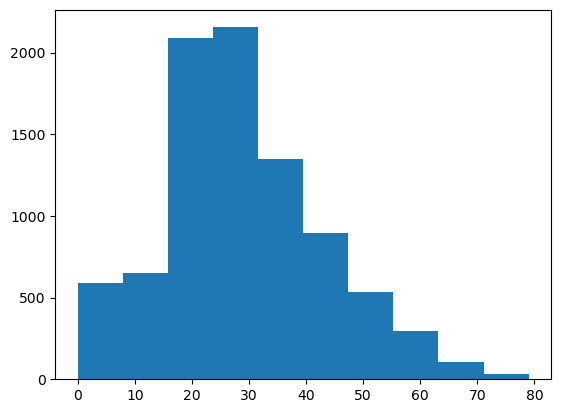

In [125]:
plt.hist(train_df['Age'])
plt.show()

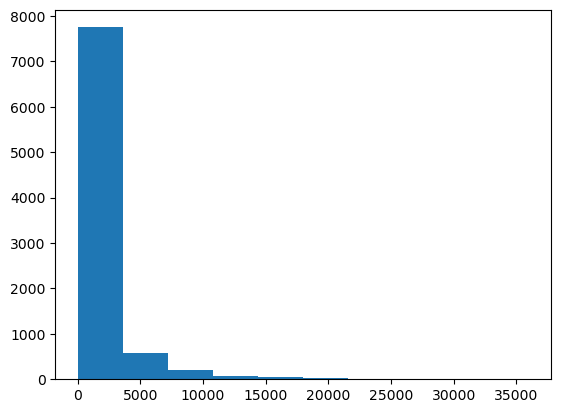

In [126]:
plt.hist(train_df['TotalExpenses'])
plt.show()

In [127]:
train_df['Age'] = train_df['Age'].rolling(window=3).mean().fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].rolling(window=3).mean().fillna(test_df['Age'].mean())

train_df['TotalExpenses'] = train_df['TotalExpenses'].rolling(window=20).mean().fillna(train_df['TotalExpenses'].mean())
test_df['TotalExpenses'] = test_df['TotalExpenses'].rolling(window=20).mean().fillna(test_df['TotalExpenses'].mean())

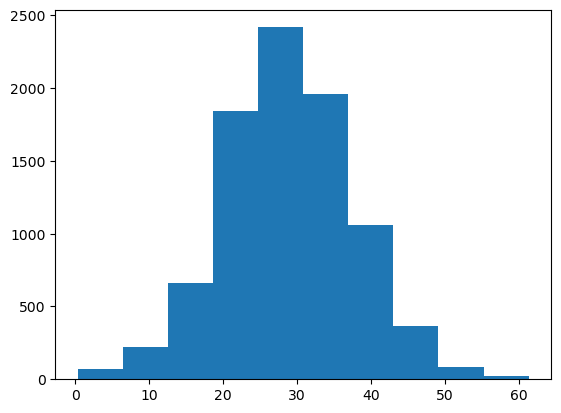

In [128]:
plt.hist(train_df['Age'])
plt.show()

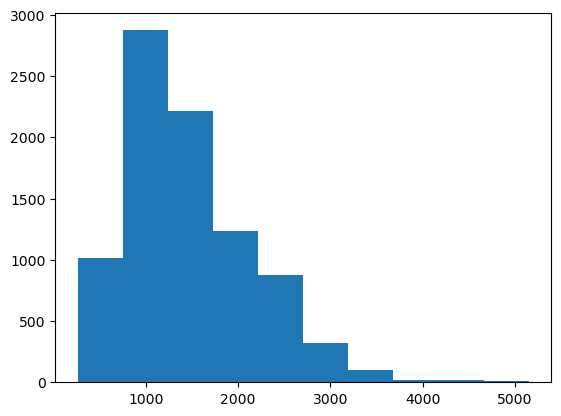

In [129]:
plt.hist(train_df['TotalExpenses'])
plt.show()

## EDA

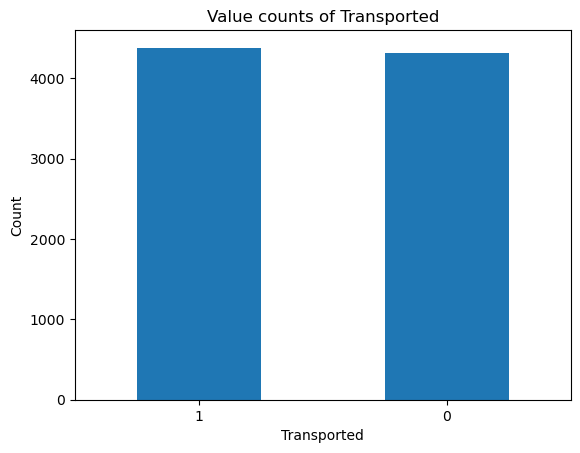

In [130]:
train_df.Transported.value_counts().plot(kind="bar")
plt.title("Value counts of Transported")
plt.xlabel("Transported")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

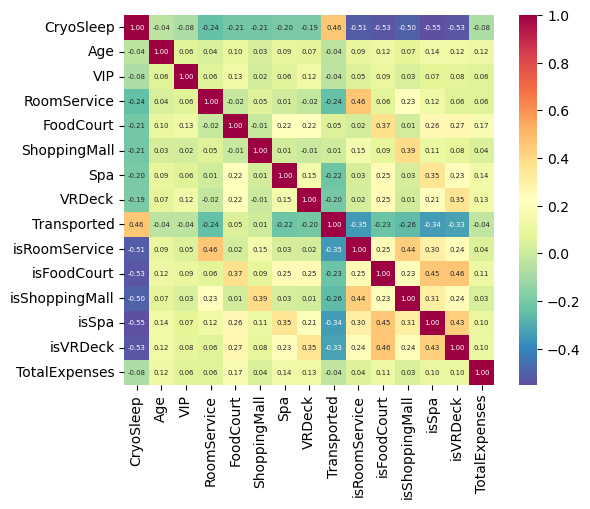

In [161]:
corrmat = train_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 cmap="Spectral_r")
plt.show()

In [131]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Num', 'Side', 'isRoomService',
       'isFoodCourt', 'isShoppingMall', 'isSpa', 'isVRDeck', 'TotalExpenses'],
      dtype='object')

## Machine Learning

In [145]:
X = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'isFoodCourt', 'isShoppingMall', 'isRoomService', 'isVRDeck', 'isSpa', 'TotalExpenses']]
y = train_df[['Transported']]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [147]:
numeric_features = ["Age", "TotalExpenses"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'isFoodCourt', 'isShoppingMall', 'isRoomService', 'isVRDeck', 'isSpa']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [148]:
pipe = Pipeline([("preprocessor", preprocessor),  ("classifier", LogisticRegression())], verbose = True)


In [149]:
pipe.fit(X_train, y_train)


[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


C:\Users\varun\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'TotalExpenses']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x000001819C3C4670>))]),
                                                  ['HomePlanet', 'CryoSleep',
                               

In [150]:
print(accuracy_score(y_test, pipe.predict(X_test)))


0.7381134969325154


In [151]:
features = test_df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'isFoodCourt', 'isShoppingMall', 'isRoomService', 'isVRDeck', 'isSpa', 'TotalExpenses']]


In [152]:
test_pred = pipe.predict(features)

In [157]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Transported': test_pred})
output['Transported'] = output['Transported'].astype(bool)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
